In [3]:
# Data Preprocessing Cherkasov V.K

In [1]:
# Устанавливаем все необходимые библиотеки для начала работы.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Загружаем наш датасет
mk = pd.read_csv('rofl.csv', sep=',')


In [3]:
mk

,Wind_direction,Pressure,Humidity,Temperature
0,301.9,885.2,91.3,-3.0
1,301.2,887.8,91.1,-3.0
2,300.8,893.7,91.2,-2.8
3,297.6,904.0,90.7,-2.7
4,304.5,903.2,91.5,-2.6
...,...,...,...,...
3383,61.7,910.8,53.3,12.3
3384,62.1,910.3,53.0,12.6
3385,46.6,910.4,52.0,13.2
3386,64.4,910.8,51.6,13.4


In [4]:
# Смотрим статистику нашего датасета
mk.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,3388.000000,3388.000000,3388.000000,3388.000000
mean,190.921547,896.513282,60.929988,-0.261216
std,99.982734,15.620523,20.765840,3.931768
min,17.200000,879.500000,20.200000,-8.500000
25%,93.000000,884.400000,44.700000,-3.100000
50%,126.300000,887.800000,60.400000,-1.000000
75%,294.000000,914.600000,73.225000,2.100000
max,352.900000,939.000000,99.400000,13.500000


In [5]:
# Проверяем наши данные на наличие пропусков
mk['Wind_direction'].unique(), mk['Temperature'].unique(), mk['Humidity'].unique() , mk['Pressure'].unique()

(array([301.9, 301.2, 300.8, ...,  62.1,  46.6,  64.4]),
 array([-3. , -2.8, -2.7, -2.6, -2.4, -2.1, -1.7, -1.1, -0.9, -0.7, -0.4,
        -0.2,  0. ,  0.4,  0.6,  1. ,  1.2,  1.9,  1.6,  2.2,  2.1,  2.4,
         2.6,  2.9,  2.7,  2.5,  2.3,  2. ,  1.8,  1.7,  1.5,  1.3,  1.1,
         0.9,  0.8,  0.5,  0.2,  0.3, -0.3, -0.8, -1. , -1.3, -1.4, -0.6,
        -1.2, -1.5, -2. , -1.6, -1.9, -2.3, -1.8, -0.1,  0.7,  1.4,  3. ,
         3.3,  3.6,  3.4,  3.8,  4. ,  3.9,  4.4,  4.3,  4.2,  3.7,  0.1,
         3.1,  3.5,  4.6,  4.9,  5.3,  5.6,  6.2,  6.8,  6.7,  6.6,  7.1,
         7. ,  7.2,  7.3,  6.9,  6.4,  6.3,  5.9,  5.4,  5. ,  4.8,  2.8,
        -2.2, -2.5, -2.9, -3.1, -3.2, -3.3, -3.5, -3.7, -3.8, -3.9, -4. ,
        -4.2, -4.3, -4.4, -4.5, -4.6, -4.7, -4.8, -5. , -5.1, -5.2, -5.3,
        -0.5, -3.4, -3.6, -4.1, -4.9, -5.5, -5.6, -5.8, -5.9, -6.2, -6.5,
        -6.3, -6.1, -6.4, -6.6, -6.9, -7.2, -7.1, -7.4, -7. , -7.3, -7.9,
        -8. , -7.8, -7.7, -8.1, -8.2, -8.3, -8.5, -7.6,

In [6]:
# Проверяем наш дата сет на наличие выбросов и избавляемся от них.
def outliers(mk):
    num_var = list(mk._get_numeric_data().columns)
    for col_names in num_var:
        mk[col_names] = mk[col_names].apply(lambda y: mk[col_names].mean()-3*mk[col_names].std() 
                            if y < mk[col_names].mean()-3*mk[col_names].std() else y)
        mk[col_names] = mk[col_names].apply(lambda y: mk[col_names].mean()+3*mk[col_names].std() 
                            if y > mk[col_names].mean()+3*mk[col_names].std() else y)
    return(mk)

In [7]:
# Повторно смотрим на статистику датасета. Как итог, после преобразований ничего не изменилось, что означает, что выбросов не было
mk = outliers(mk)
mk.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,3388.000000,3388.000000,3388.000000,3388.000000
mean,190.921547,896.513282,60.929988,-0.263703
std,99.982734,15.620523,20.765840,3.923832
min,17.200000,879.500000,20.200000,-8.500000
25%,93.000000,884.400000,44.700000,-3.100000
50%,126.300000,887.800000,60.400000,-1.000000
75%,294.000000,914.600000,73.225000,2.100000
max,352.900000,939.000000,99.400000,11.534087


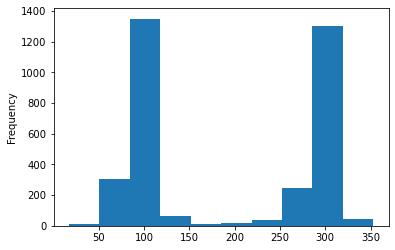

In [8]:
# Построим гистаграмы по каждой из переменных
mk['Wind_direction'].plot(kind = 'hist')

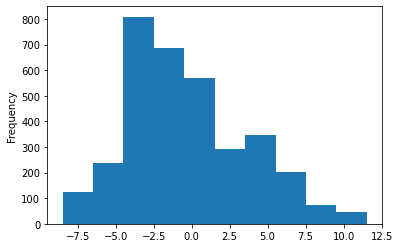

In [9]:
mk['Temperature'].plot(kind = 'hist')

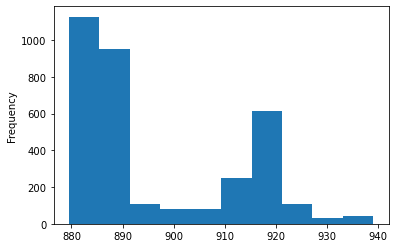

In [10]:
mk['Pressure'].plot(kind = 'hist')

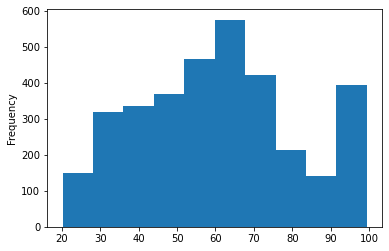

In [11]:
mk['Humidity'].plot(kind = 'hist')

In [12]:
# Строим корреляционную матрциу. Наиболее коррелируемым фактором является Humidity
mk.corr ()

,Wind_direction,Pressure,Humidity,Temperature
Wind_direction,1.000000,0.147581,-0.359865,0.066964
Pressure,0.147581,1.000000,-0.312852,0.271711
Humidity,-0.359865,-0.312852,1.000000,-0.336484
Temperature,0.066964,0.271711,-0.336484,1.000000


In [13]:
# Делим наш дата сет на обучающую и тестовую выборку
X = mk.iloc[:, :-1].values
y = mk.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [14]:
# Строим простую линейную регрессию зависимости от одного фактора (Humidity)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 2:3], y_train)

In [15]:
# Оцениваем полученные параметры
sr.coef_, sr.intercept_

(array([-0.0664175]), 3.8153246181727503)

In [16]:
# Делаем прогноз 
y_pred = sr.predict(X_test[:, 2:3])

In [17]:
# Проверяем кэф. детерминации, который равен 0.12 для обучающей и 0.06 для тестовой , что является совсем маленьким значением доверия.
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:, 2:3], y_test)

(0.12423247287663497, 0.06662919258237043)

In [18]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(13.544660505748867, 14.089669475099534)

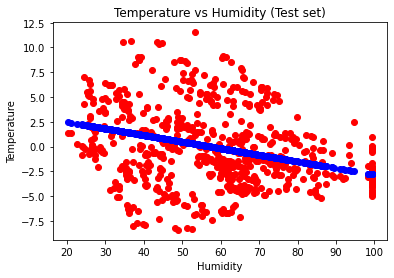

In [19]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что простая линейная регрессия описывает модель не точно.
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sr.predict(X_test[:, 2:3]), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [20]:
# Множественная регрессия. Проверяем P value - делаем выводы , что все переменные значимые и будем использовать их как основу.
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          1.65e-103
Time:                        14:11:33   Log-Likelihood:                -7316.4
No. Observations:                2710   AIC:                         1.464e+04
Df Residuals:                    2706   BIC:                         1.466e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.9597      4.277     -9.577      0.000     -49.346     -32.574
x1            -0.0025      0.001     -3.330      0.001      -0.004      -0.001
x2             0.0500      0.005     10.650      0.000       0.041       0.059
x3            -0.0588      0.004    -15.912      0.000      -0.066      -0.052
==============================================================================
Omnibus:                       28.548   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.171
Skew:                           0.251   Prob(JB):                     4.63e-07
Kurtosis:                       3.081   Cond. No.                     5.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Определяем значимые переменные с погрешностью 5%.
def backwardElimination(x, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [22]:
X_train = X_train[:, [0, 1, 2]]
X_test = X_test[:, [0, 1, 2]]

In [23]:
# Строим множественную регрессию на обучающейся выборке.
mr = LinearRegression().fit(X_train, y_train)

In [24]:
# Получаем и оцениваем параметры.
mr.coef_, mr.intercept_

(array([-0.00245737,  0.04995137, -0.05875412]), -40.95969596955336)

In [25]:
# Строим прогноз.
y_pred = mr.predict(X_test)

In [26]:
# Проверяем кэф. детерминации, который равен 0.16 для обучающей и 0.08 для тестоовой, лучше чем в моделе однофактороной регрессии, но по прежнему низкий.
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.1622224647843865, 0.08817785044275872)

In [27]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой. Ошибка меньше в сравнении с однофакторной регрессией.
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(12.957105558722201, 13.764382392546684)

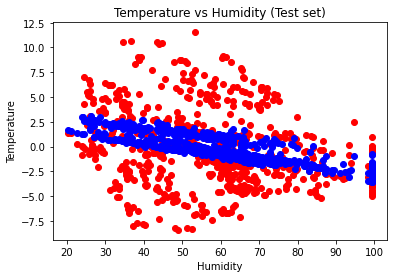

In [28]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что множественная линейная регрессия описывает модель лучше, чем однофакторная, стала более точнее.
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [29]:
# Построим полиномиальную регрессию для нашего датасета.
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [30]:
# Получаем и оцениваем параметры
pr.coef_, pr.intercept_

(array([-3.64455528e-02,  1.50027429e+01,  9.91825553e-01,  1.34042782e-04,
        -2.46319287e-05,  8.11862956e-05, -8.24210783e-03, -1.16041702e-03,
        -1.17938238e-04]),
 -6816.506550732889)

In [31]:
# Строим прогноз
y_pred = pr.predict(X_test_p[:,1:])

In [32]:
# Проверяем кэф. детерминации, который равен 0.27 для обучающей и 0.20 для тестовой. Кэф. детерминации стал больше в сравнении с множественноей регрессией.
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.27411245020680775, 0.20888491396846176)

In [33]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой. Ошибка меньше в сравнении с множественной регрессией.
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(11.226609942473573, 11.942252736389543)

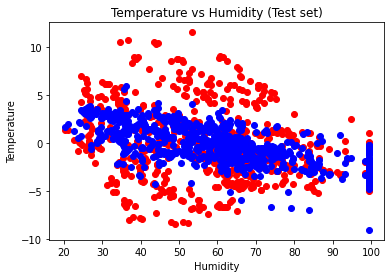

In [34]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что полиномиальная регрессия описывает модель лучше, чем однофакторная и множественная. Модель более точно описывает значения.
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [35]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('kr_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [36]:
# Загружаем наши данные для построения нейронной сети.
import pickle
input = open('kr_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [37]:
# Проводим шкалирование.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [38]:
# Подключаем необходимые библиотеки.
import keras
from keras.models import Sequential
from keras.layers import Dense


In [39]:
# Создаём сеть RNN, она будет последовательной. На первом и втором слое берем тангенс для повышенной точности. Для последнего слоя используем линейную функцию активациит 
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(units = 4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [40]:
# Обучаем нашу нейронную сеть.
rnn.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
271/271 [==============================] - 0s 467us/step - loss: 1.1662 - accuracy: 0.0000e+00
Epoch 2/100
271/271 [==============================] - 0s 435us/step - loss: 0.8332 - accuracy: 0.0000e+00
Epoch 3/100
271/271 [==============================] - 0s 445us/step - loss: 0.8273 - accuracy: 0.0000e+00
Epoch 4/100
271/271 [==============================] - 0s 450us/step - loss: 0.8230 - accuracy: 0.0000e+00
Epoch 5/100
271/271 [==============================] - 0s 430us/step - loss: 0.8172 - accuracy: 0.0000e+00
Epoch 6/100
271/271 [==============================] - 0s 439us/step - loss: 0.8121 - accuracy: 0.0000e+00
Epoch 7/100
271/271 [==============================] - 0s 517us/step - loss: 0.8052 - accuracy: 0.0000e+00
Epoch 8/100
271/271 [==============================] - 0s 464us/step - loss: 0.7973 - accuracy: 0.0000e+00
Epoch 9/100
271/271 [==============================] - 0s 450us/step - loss: 0.7889 - accuracy: 0.0000e+00
Epoch 10/100
271/271 [===============

Epoch 77/100
271/271 [==============================] - 0s 440us/step - loss: 0.6059 - accuracy: 0.0000e+00
Epoch 78/100
271/271 [==============================] - 0s 426us/step - loss: 0.6041 - accuracy: 0.0000e+00
Epoch 79/100
271/271 [==============================] - 0s 436us/step - loss: 0.6011 - accuracy: 0.0000e+00
Epoch 80/100
271/271 [==============================] - 0s 427us/step - loss: 0.5984 - accuracy: 0.0000e+00
Epoch 81/100
271/271 [==============================] - 0s 430us/step - loss: 0.5981 - accuracy: 0.0000e+00
Epoch 82/100
271/271 [==============================] - 0s 440us/step - loss: 0.5955 - accuracy: 0.0000e+00
Epoch 83/100
271/271 [==============================] - 0s 441us/step - loss: 0.5946 - accuracy: 0.0000e+00
Epoch 84/100
271/271 [==============================] - 0s 439us/step - loss: 0.5919 - accuracy: 0.0000e+00
Epoch 85/100
271/271 [==============================] - 0s 436us/step - loss: 0.5908 - accuracy: 0.0000e+00
Epoch 86/100
271/271 [======

In [41]:
# Строим прогноз.
y_pred = rnn.predict(X_test)

In [42]:
# Проводим обратное шкалирование
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [43]:
# Расчитываем среднеквадратическую ошибку. Она значительно меньше в сравнении с предыдущими моделями тестовой выборки.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

9.641156904594386

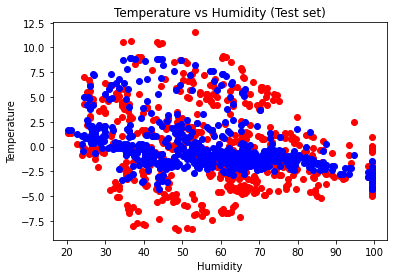

In [46]:
# Визуализируем нашу полученную модель. Как мы видим, что данная нейронная сеть наиболее точно описывает нашу выборку, в сравнении с другими моделями.
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()